In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)

In [3]:
data = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [4]:
data.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [8]:
data1 = data.copy()
data1['quality_map'] = data['quality'].apply(lambda x:0 if x<4 else (1 if x>3 and x<7 else 2))
data1.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_map
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,2
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,2
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1


In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  quality_map           1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


# DATA VISUALISATION

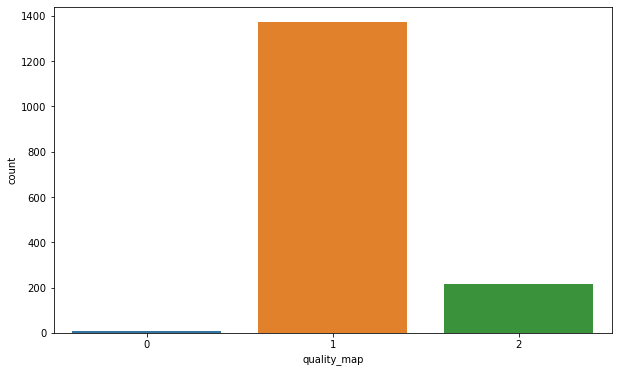

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(data1['quality_map'])

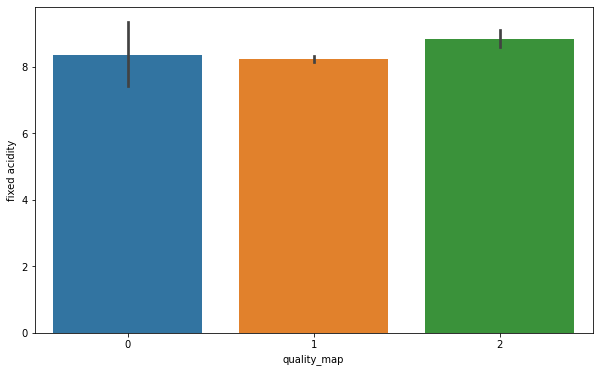

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(y='fixed acidity',x='quality_map',data=data1)

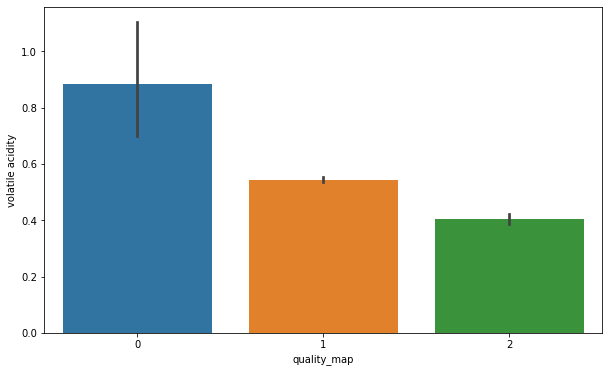

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(y='volatile acidity',x='quality_map',data=data1)

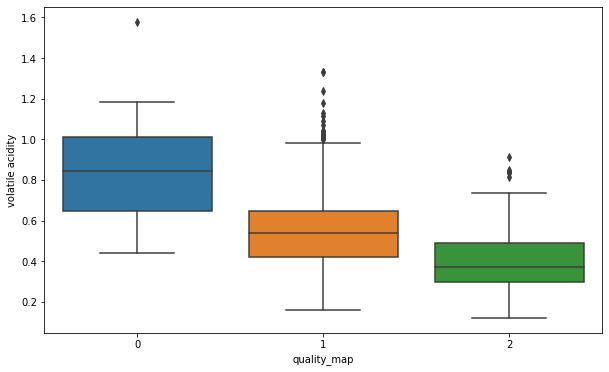

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(y='volatile acidity',x='quality_map',data=data1)

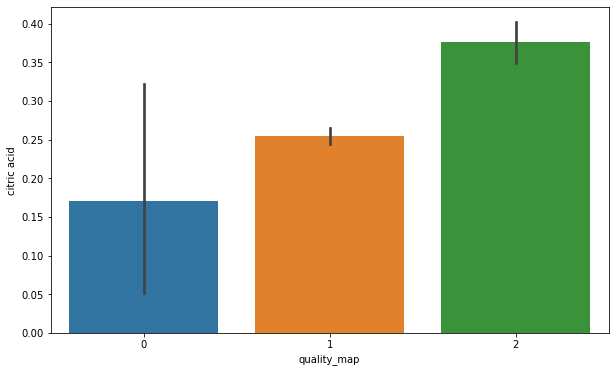

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(y='citric acid',x='quality_map',data=data1)

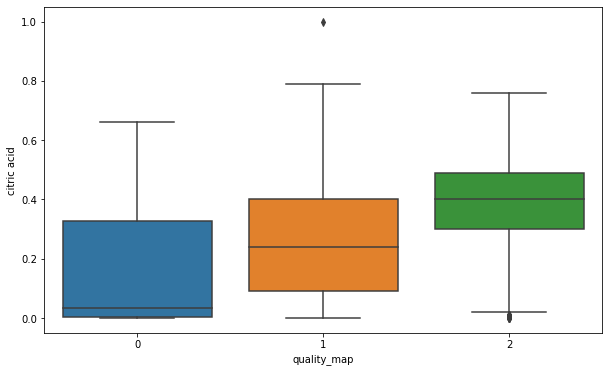

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(y='citric acid',x='quality_map',data=data1)

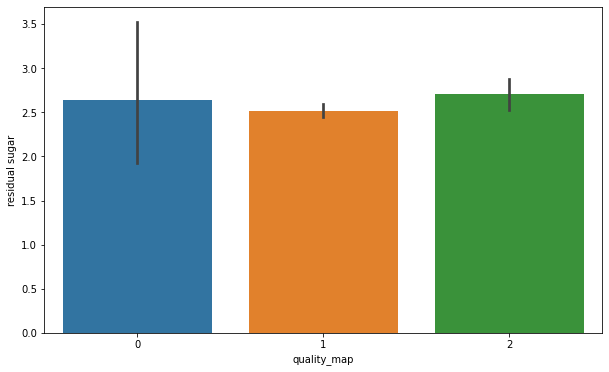

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(y='residual sugar',x='quality_map',data=data1)

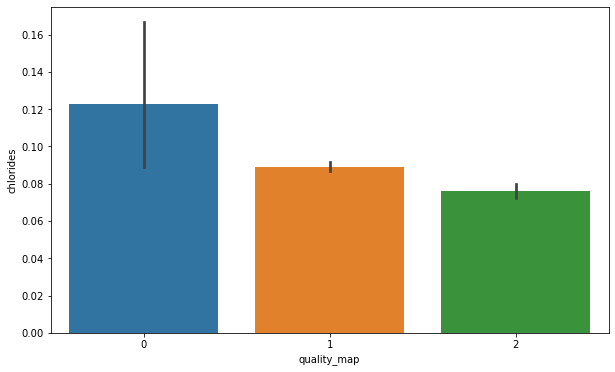

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(y='chlorides',x='quality_map',data=data1)

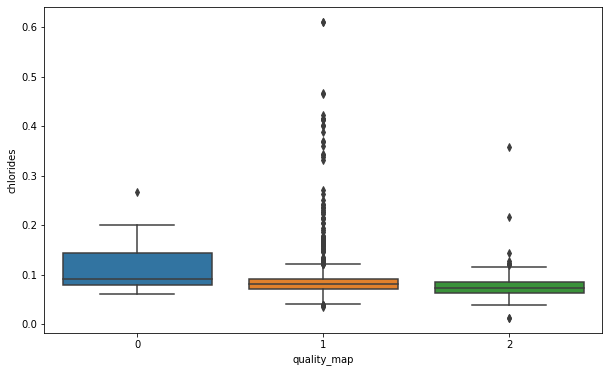

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(y='chlorides',x='quality_map',data=data1)

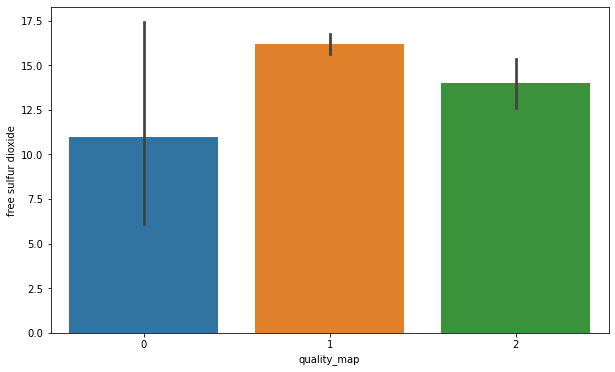

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(y='free sulfur dioxide',x='quality_map',data=data1)

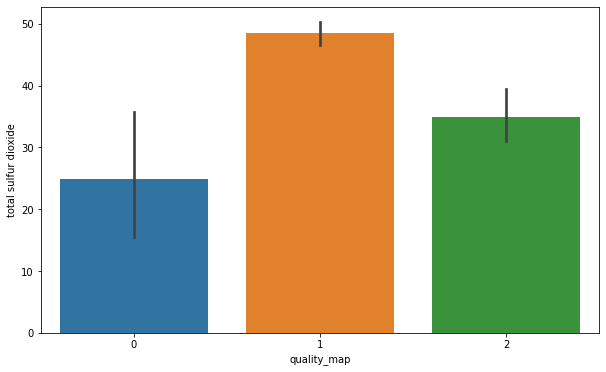

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(y='total sulfur dioxide',x='quality_map',data=data1)

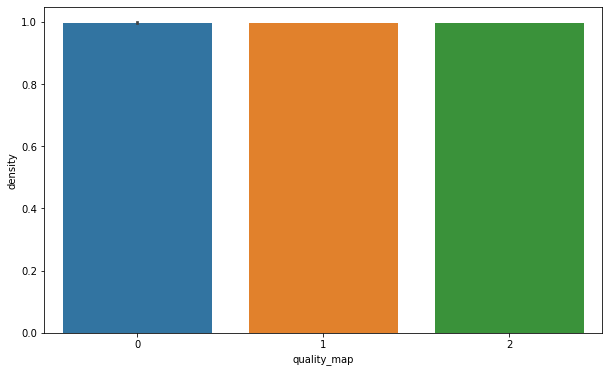

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(y='density',x='quality_map',data=data1)

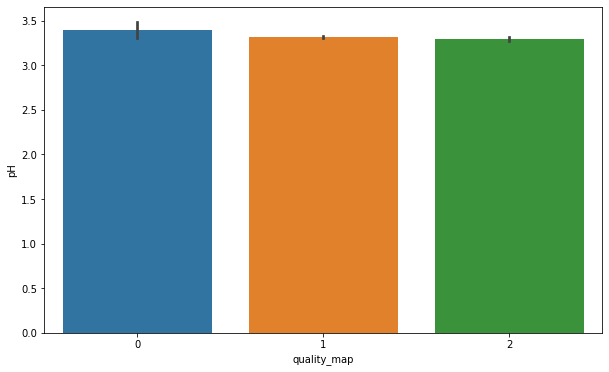

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(y='pH',x='quality_map',data=data1)

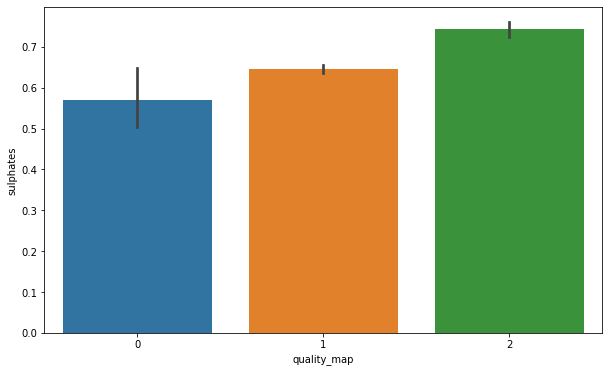

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(y='sulphates',x='quality_map',data=data1)

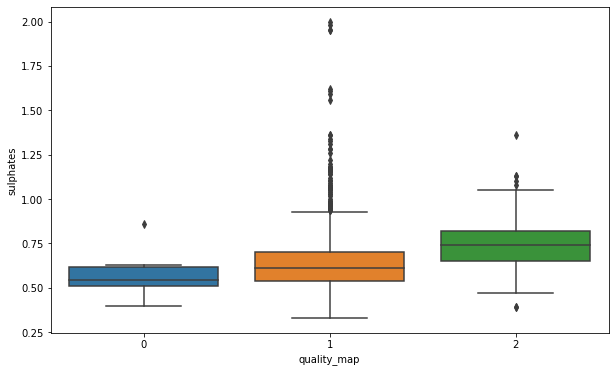

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(y='sulphates',x='quality_map',data=data1)

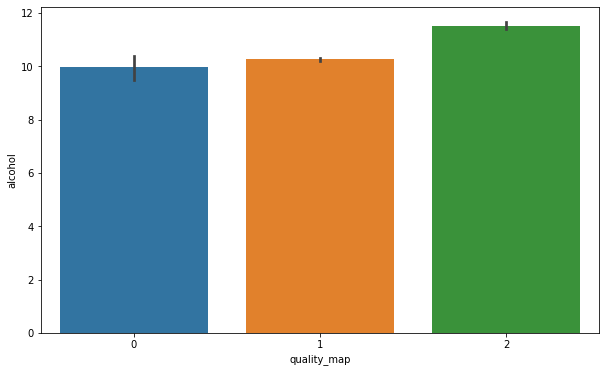

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(y='alcohol',x='quality_map',data=data1)

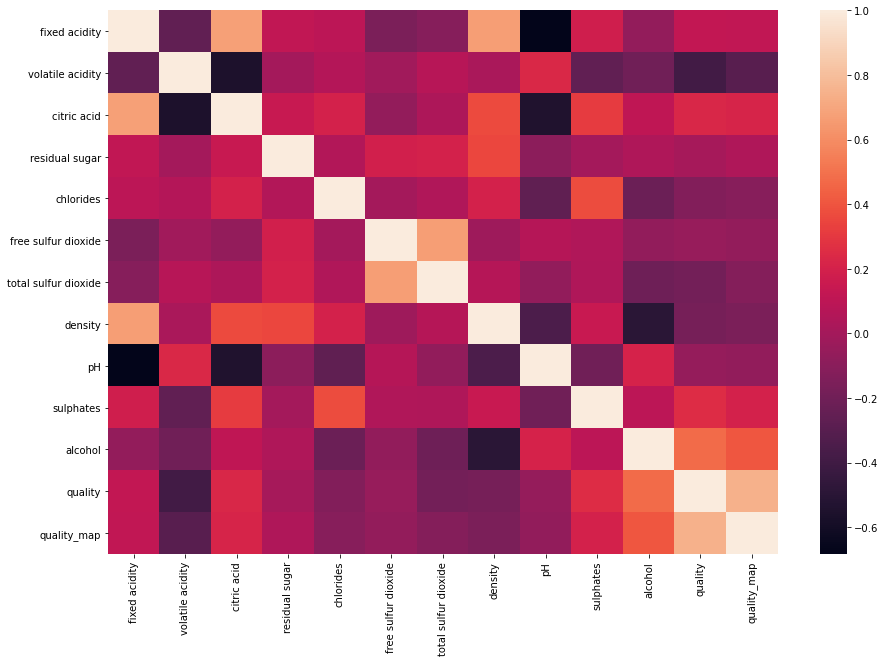

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(data1.corr())

# DATA PREPARATION AND MODELLING

In [27]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  quality_map           1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [28]:
features = ['fixed acidity','volatile acidity','citric acid','chlorides','free sulfur dioxide',
           'total sulfur dioxide','sulphates','alcohol','residual sugar','pH','density']
features1 = ['fixed acidity','citric acid','sulphates','alcohol']
X = data1[features]
y = data1['quality_map']
print(X.shape,y.shape)

(1599, 11) (1599,)


In [29]:
X.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,residual sugar,pH,density
0,7.4,0.70,0.00,0.076,11.0,34.0,0.56,9.4,1.9,3.51,0.9978
1,7.8,0.88,0.00,0.098,25.0,67.0,0.68,9.8,2.6,3.20,0.9968
2,7.8,0.76,0.04,0.092,15.0,54.0,0.65,9.8,2.3,3.26,0.9970
3,11.2,0.28,0.56,0.075,17.0,60.0,0.58,9.8,1.9,3.16,0.9980
4,7.4,0.70,0.00,0.076,11.0,34.0,0.56,9.4,1.9,3.51,0.9978


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1279, 11) (1279,) (320, 11) (320,)


In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
X_train

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  0.30972563,
         1.09349989,  1.84669643],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.80507963,
        -0.40043872, -3.00449133],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.52637831,
        -0.07566946,  0.76865471],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  0.10069964,
         1.28836145,  0.36977927],
       [-0.24582155, -1.84458448,  0.39683051, ..., -0.59605364,
         0.05423824, -1.18260081],
       [-1.46422367, -1.34236676, -0.06383064, ..., -0.59605364,
         0.50891521, -2.84278507]])

In [33]:
rf = RandomForestClassifier(bootstrap=True,random_state=42,max_depth=35,
                           n_estimators=2500,n_jobs=-1)
rf.fit(X_train,y_train)
accuracy_score(y_test,rf.predict(X_test))

0.896875

In [34]:
xgb = XGBClassifier( booster='gbtree', colsample_bylevel=1,colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=4, n_estimators=4500,
             n_jobs=4, nthread=None, 
             reg_alpha=0.6, reg_lambda=0.6,
             silent=None, subsample=0.8, verbosity=1)
xgb.fit(X_train,y_train)
accuracy_score(y_test,xgb.predict(X_test))

0.90625

In [35]:
pred = xgb.predict(X_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,

In [36]:
y_test.value_counts()

1    272
2     47
0      1
Name: quality_map, dtype: int64

In [37]:
output = pd.DataFrame({'Actual_quality': y_test,'Predicted_quality': pred})
output.head(15)

,Actual_quality,Predicted_quality
803,1,1
124,1,1
350,1,1
682,1,1
1326,1,1
976,1,1
1493,1,1
706,1,1
613,1,1
1587,1,1


In [38]:
output['Actual_quality'] = output['Actual_quality'].apply(lambda x:'Bad' if x==0 else('Average' if x==1 else 'Good'))
output['Predicted_quality'] = output['Predicted_quality'].apply(lambda x:'Bad' if x==0 else('Average' if x==1 else 'Good'))

In [39]:
output.head(15)

,Actual_quality,Predicted_quality
803,Average,Average
124,Average,Average
350,Average,Average
682,Average,Average
1326,Average,Average
976,Average,Average
1493,Average,Average
706,Average,Average
613,Average,Average
1587,Average,Average


In [40]:
output.to_csv('Wine_predictions.csv',index=True)